# E-Commerce Data
This dataset consists of orders made in different countries from December 2010 to December 2011. The company is a UK-based online retailer that mainly sells unique all-occasion gifts. Many of its customers are wholesalers. 

this work has done by Fakher Odeh

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
data = pd.read_csv("online_retail.csv")
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


## Data Dictionary
| Variable    | Explanation                                                                                                                       |
|-------------|-----------------------------------------------------------------------------------------------------------------------------------|
| InvoiceNo   | A 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c' it indicates a cancellation. |
| StockCode   | A 5-digit integral number uniquely assigned to each distinct product.                                                             |
| Description | Product (item) name                                                                                                               |
| Quantity    | The quantities of each product (item) per transaction                                                                             |
| InvoiceDate | The day and time when each transaction was generated                                                                              |
| UnitPrice   | Product price per unit in sterling (pound)                                                                                        |
| CustomerID  | A 5-digit integral number uniquely assigned to each customer                                                                      |
| Country     | The name of the country where each customer resides                                                                               |

[Source](https://archive.ics.uci.edu/ml/datasets/online+retail#)  of dataset.

**Citation:** Daqing Chen, Sai Liang Sain, and Kun Guo, Data mining for the online retail industry: A case study of RFM model-based customer segmentation using data mining, Journal of Database Marketing and Customer Strategy Management, Vol. 19, No. 3, pp. 197-208, 2012 (Published online before print: 27 August 2012. doi: 10.1057/dbm.2012.17).

In [11]:
#here we will explore negative order quantities indicate retuyrnes whjoch productys have been returned the most...
returns = data[data['Quantity']<0]

returned_products = returns.groupby('StockCode')['Quantity'].count()
returned_products = returned_products.sort_values(ascending=False)

returned_products = returned_products.reset_index()
returned_products = returned_products.merge(data[['StockCode', 'Description']], on='StockCode', how='left')
print(returned_products.head(100))  

   StockCode  Quantity Description
0          M       244      Manual
1          M       244      Manual
2          M       244      Manual
3          M       244      Manual
4          M       244      Manual
..       ...       ...         ...
95         M       244      Manual
96         M       244      Manual
97         M       244      Manual
98         M       244      Manual
99         M       244      Manual

[100 rows x 3 columns]


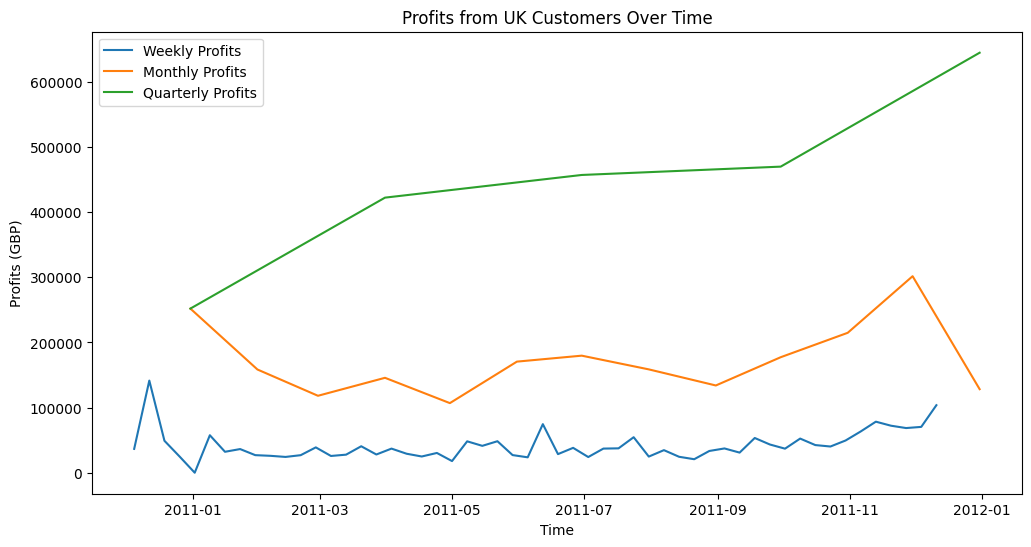

In [12]:
#Visualize: Createing a plot visualizing for the profits earned from UK customers weekly, monthly, and quarterly.

uk_customers = data[data['Country']=='United Kingdom']
uk_customers['InvoiceDate'] = pd.to_datetime(uk_customers['InvoiceDate'])

weekly_profits = uk_customers.resample('W',on='InvoiceDate')['UnitPrice'].sum()
monthly_profits = uk_customers.resample('M',on='InvoiceDate')['UnitPrice'].sum()
quarterly_profits = uk_customers.resample('Q',on='InvoiceDate')['UnitPrice'].sum()
plt.figure(figsize=(12, 6))
plt.plot(weekly_profits, label='Weekly Profits')
plt.plot(monthly_profits, label='Monthly Profits')
plt.plot(quarterly_profits, label='Quarterly Profits')
plt.xlabel('Time')
plt.ylabel('Profits (GBP)')
plt.title('Profits from UK Customers Over Time')
plt.legend()
plt.show()

In [13]:
#chekcing if the order size from countries outside the UK significantly larger than the order size from inside the UK

uk_customers = data[data['Country']=='United Kingdom']
non_uk_customers = data[data['Country']!= 'United Kingdom']

MeanOrderSizeUk = uk_customers['Quantity'].mean()
MeanOrderSizeNonUk = non_uk_customers['Quantity'].mean()
#this line we use ttest to check if the difference is significant
t_stat, p_value = stats.ttest_ind(uk_customers['Quantity'], non_uk_customers['Quantity'], equal_var=False)
print(f"Mean Order Size From UK Customers : {MeanOrderSizeNonUk}")
print(f"Mean Order Size From Non Uk Customers : {MeanOrderSizeNonUk}")
print(f"T-Stat: {t_stat}, P-Value: {p_value}")


Mean Order Size From UK Customers : 19.655424177812236
Mean Order Size From Non Uk Customers : 19.655424177812236
T-Stat: -28.28773649044806, P-Value: 8.016002231357573e-176
